In [1]:
import json
import pandas as pd
with open("../data/interm/vocab.json", "r") as json_file:
    vocab = json.load(json_file)

In [2]:
test_df = pd.read_csv("../data/interm/test.csv")

In [3]:
for original, item in vocab.items():
    test_df['translate'] = test_df['reference'].str.replace(original, item)

In [4]:
test_df['translate'] = test_df['reference']

# Проходим по словарю замен и заменяем соответствующие слова в столбце "translate"
for original, item in vocab.items():
    test_df['translate'] = test_df['translate'].str.replace(original, item)

In [5]:
test_df.head(20)

,reference,ref_tox,translate
0,"They're all laughing at us, so we'll kick your...",0.999492,"They're all lasomethinging at us, so we'll kic..."
1,"Come on, Cal, leave that shit alone.",0.999637,"Come on, Cal, your that . of."
2,I like that shit.,0.999594,I like that ..
3,How is this not porn? This is porn that comes ...,0.933948,How is this havet porn? This is porn that come...
4,"Now, I understand you got your grievances with...",0.999603,".w, I understand you got your ands with these ..."
5,"I'll rot in front of his cameras, on him.",0.987824,"I'll rot in front of his cameras, on him."
6,"Tell him if Elena doesn't pick up the phone, w...",0.995638,"Tell him if Elena doesn't pick up the phone, w..."
7,You wanna know why? if anything happens that's...,0.938261,You wanna khavew why? if anything happens that...
8,You must've been pissed. Damn straight.,0.991549,You must've been .ed. I straight.
9,The only crime he committed Was standing up to...,0.999450,The only a he committed Was standing up to tha...


In [6]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_test = test_df['translate']
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_test_tfidf = tfidf_vectorizer.fit_transform(X_test)


In [8]:
y_pred = model.predict(X_test_tfidf.toarray())

157/157 [==============================] - 0s 2ms/step


In [9]:
test_df['tr_tox'] = y_pred

In [10]:
test_df['result'] = test_df['ref_tox']-test_df['tr_tox']

In [11]:
test_df['result']

0       0.812771
1       0.908717
2       0.014854
3       0.031617
4       0.686573
          ...   
4995    0.005859
4996    0.997694
4997    0.403971
4998    0.939531
4999    0.744535
Name: result, Length: 5000, dtype: float64

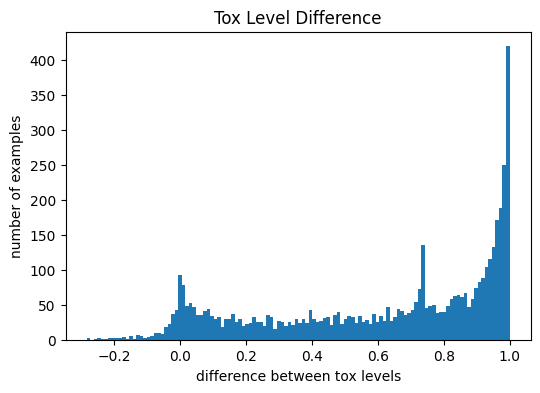

In [12]:
import matplotlib.pyplot as plt

result = test_df['result'].tolist()

n_bins=120
plt.figure(figsize=(6, 4))  # Создаем первый график
plt.ylabel('number of examples')
plt.xlabel('difference between tox levels')
plt.hist(result, bins=n_bins)
plt.title('Tox Level Difference')
plt.show()

In [13]:
test_df.to_csv('../data/interm/predictVOCAB.csv')